In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [3]:
import time
import sys
sys.path.insert(0,'../..')
from keras import losses, metrics
from tensorflow.keras import optimizers
import gp2
from gp2 import Runner

2023-04-23 12:33:02.565779: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2023-04-23 12:33:03.011859: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:07:00.0 name: A100-SXM4-40GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 39.59GiB deviceMemoryBandwidth: 1.41TiB/s
2023-04-23 12:33:03.016279: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 1 with properties: 
pciBusID: 0000:0f:00.0 name: A100-SXM4-40GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 39.59GiB deviceMemoryBandwidth: 1.41TiB/s
2023-04-23 12:33:03.020327: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 2 with properties: 
pciBusID: 0000:87:00.0 name: A100-SXM4-40GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 39.59GiB deviceMemoryBandwidth: 1.41TiB/s
2023-04-23 12:33:03.02

In [4]:
help(gp2.KATTUnet2D)

Help on class KATTUnet2D in module gp2.gp2.k_att_unet2d:

class KATTUnet2D(gp2.gp2.base_keras_segmentation_classifier.BaseKerasSegmentationClassifier)
 |  KATTUnet2D(input_size=(512, 512, 1), filter_num=None, n_labels=1, stack_num_down=2, stack_num_up=2, activation='ReLU', atten_activation='ReLU', attention='add', output_activation='Sigmoid', batch_norm=True, pool=True, unpool=True, backbone=None, weights='imagenet', freeze_backbone=True, freeze_batch_norm=True, name='attunet', optimizer=None, loss=None, metric=None, verbose=False, workingdir='/tmp')
 |  
 |  Attention U-net with an optional ImageNet backbone
 |  
 |  Method resolution order:
 |      KATTUnet2D
 |      gp2.gp2.base_keras_segmentation_classifier.BaseKerasSegmentationClassifier
 |      gp2.gp2.classifier.Classifier
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, input_size=(512, 512, 1), filter_num=None, n_labels=1, stack_num_down=2, stack_num_up=2, activation='ReLU', atten_activation='ReLU

In [6]:
R = Runner(verbose=True, 
           classifier='kattunet2d',
           filter_num=[16, 32, 64, 128, 256, 512],
           stack_num_down=3,
           stack_num_up=2,
           activation='ReLU',
           atten_activation='ReLU',
           attention='add',
           output_activation='Sigmoid',
           batch_norm=False,
           pool=True,
           unpool=True,
           weights='imagenet',
           optimizer= optimizers.Adamax(), #None = default is optimizers.Adam(learning_rate=1e-3)
           loss=losses.BinaryCrossentropy(), #None = default is losses.binary_crossentropy
           metric=metrics.binary_accuracy # None = default is Util.dice_coef
          )

*** GP2 KATTUnet2D ***
Working directory: /tmp/tmpxzz29t8qGP2
Verbose mode active!
{'verbose': True, 'workingdir': '/tmp/tmpxzz29t8qGP2', 'input_size': (512, 512, 1), 'filter_num': [16, 32, 64, 128, 256, 512], 'n_labels': 1, 'stack_num_down': 3, 'stack_num_up': 2, 'activation': 'ReLU', 'atten_activation': 'ReLU', 'attention': 'add', 'output_activation': 'Sigmoid', 'batch_norm': False, 'pool': True, 'unpool': True, 'backbone': None, 'weights': 'imagenet', 'freeze_backbone': True, 'freeze_batch_norm': True, 'name': 'attunet', 'optimizer': <tensorflow.python.keras.optimizer_v2.adamax.Adamax object at 0x7fa1605367f0>, 'loss': <keras.losses.BinaryCrossentropy object at 0x7fa160536e50>, 'metric': <function binary_accuracy at 0x7fa16be08b80>, 'model': <tensorflow.python.keras.engine.functional.Functional object at 0x7fa16022c4f0>}
Model summary:
Model: "attunet_model"
__________________________________________________________________________________________________
Layer (type)               

In [7]:
# load our larger toy dataset (10k images and masks)
images = np.load('/hpcstor6/scratch01/r/ryan.zurrin001/GP2TOYEXAMPLE_LARGE/images.npy')
masks = np.load('/hpcstor6/scratch01/r/ryan.zurrin001/GP2TOYEXAMPLE_LARGE/masks.npy')

In [8]:
images = images[:5000]
masks = masks[:5000]

In [9]:
images.shape

(5000, 512, 512, 1)

In [10]:
masks.shape

(5000, 512, 512, 1)

In [11]:
weights = {
    'A': 0.5,
    'A_train': 0.1,
    'A_val': 0.3,
    'A_test': 0.6,
    'B': 0.3,
    'B_train': 0.7,
    'B_val': 0.1,
    'B_test': 0.2,
    'Z': 0.2
}

In [12]:
R.run(images=images, masks=masks, weights=weights, runs=5)

Weights OK!
******
Loop 0


2023-04-23 12:33:40.029637: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2023-04-23 12:33:40.030322: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2245755000 Hz


Epoch 1/100


2023-04-23 12:33:44.249178: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudnn.so.8
2023-04-23 12:33:44.873944: I tensorflow/stream_executor/cuda/cuda_dnn.cc:359] Loaded cuDNN version 8201
2023-04-23 12:33:45.546742: W tensorflow/stream_executor/gpu/asm_compiler.cc:191] Falling back to the CUDA driver for PTX compilation; ptxas does not support CC 8.0
2023-04-23 12:33:45.546769: W tensorflow/stream_executor/gpu/asm_compiler.cc:194] Used ptxas at ptxas
2023-04-23 12:33:45.546831: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] Unimplemented: ptxas ptxas too old. Falling back to the driver to compile.
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.
2023-04-23 12:33:45.564362: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2023-04-23 12:33:46.332233: I tensorflow/stream_exec

4/4 [==============================] - 37s 6s/step - loss: 1.0095 - binary_accuracy: 0.5509 - val_loss: 0.9955 - val_binary_accuracy: 0.5548


2023-04-23 12:34:18.940301: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.
/home/ryan.zurrin001/miniconda3/envs/O/lib/python3.9/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 2/100
4/4 [==============================] - 3s 905ms/step - loss: 1.0095 - binary_accuracy: 0.5509 - val_loss: 0.9955 - val_binary_accuracy: 0.5548
Epoch 3/100
4/4 [==============================] - 3s 939ms/step - loss: 1.0095 - binary_accuracy: 0.5509 - val_loss: 0.9955 - val_binary_accuracy: 0.5548
Epoch 4/100
4/4 [==============================] - 3s 925ms/step - loss: 1.0098 - binary_accuracy: 0.5509 - val_loss: 0.9955 - val_binary_accuracy: 0.5548
Model saved to: /tmp/tmpxzz29t8qGP2/attunet_0attunet_model
History saved to: /tmp/tmpxzz29t8qGP2/attunet_history_0.pkl
Testing the classifier...
Model saved to /tmp/tmpxzz29t8qGP2/cnnd_0.model
History saved to /tmp/tmpxzz29t8qGP2/cnnd_history_0.pickle
Testing the discriminator...
10/10 [==============================] - 0s 21ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Found 152 machine labels.
Machine labels [  0   1   2   3   4   6  10  12  13  18  21  22  24  26  28  32  34  35
  38  39  40  41  44  45  48  50  51  53  54  57

Epoch 1/100
5/5 [==============================] - 13s 3s/step - loss: 1.0023 - binary_accuracy: 0.5519 - val_loss: 0.9955 - val_binary_accuracy: 0.5548


/home/ryan.zurrin001/miniconda3/envs/O/lib/python3.9/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 2/100
5/5 [==============================] - 4s 837ms/step - loss: 1.0025 - binary_accuracy: 0.5519 - val_loss: 0.9955 - val_binary_accuracy: 0.5548
Epoch 3/100
5/5 [==============================] - 3s 776ms/step - loss: 1.0024 - binary_accuracy: 0.5519 - val_loss: 0.9955 - val_binary_accuracy: 0.5548
Model saved to: /tmp/tmpxzz29t8qGP2/attunet_1attunet_model
History saved to: /tmp/tmpxzz29t8qGP2/attunet_history_1.pkl
Testing the classifier...
Testing the discriminator...
10/10 [==============================] - 0s 18ms/step - loss: 1.7283e-04 - accuracy: 1.0000
Found 151 machine labels.
Machine labels [  2   3   4   7  10  11  12  13  14  15  17  18  19  20  28  29  31  34
  35  36  37  38  40  41  43  46  47  48  49  50  56  58  59  60  62  64
  65  67  68  69  70  71  73  74  77  78  79  81  82  84  85  88  90  93
  97  98 102 103 104 107 108 111 112 114 116 117 118 120 125 127 132 133
 138 140 141 142 144 146 148 149 150 151 152 155 157 161 162 163 165 166
 169 170 172 175 1

Removed: 50 Filled: 50
TOOK 73.40109491348267 seconds
==== DONE LOOP 1 ====
******
Loop 2
Epoch 1/100
6/6 [==============================] - 11s 2s/step - loss: 1.0041 - binary_accuracy: 0.5526 - val_loss: 0.9955 - val_binary_accuracy: 0.5548


/home/ryan.zurrin001/miniconda3/envs/O/lib/python3.9/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 2/100
6/6 [==============================] - 4s 656ms/step - loss: 1.0038 - binary_accuracy: 0.5526 - val_loss: 0.9955 - val_binary_accuracy: 0.5548
Epoch 3/100
6/6 [==============================] - 4s 648ms/step - loss: 1.0038 - binary_accuracy: 0.5526 - val_loss: 0.9955 - val_binary_accuracy: 0.5548
Epoch 4/100
6/6 [==============================] - 4s 702ms/step - loss: 1.0041 - binary_accuracy: 0.5526 - val_loss: 0.9955 - val_binary_accuracy: 0.5548
Epoch 5/100
6/6 [==============================] - 4s 678ms/step - loss: 1.0041 - binary_accuracy: 0.5526 - val_loss: 0.9955 - val_binary_accuracy: 0.5548
Model saved to: /tmp/tmpxzz29t8qGP2/attunet_2attunet_model
History saved to: /tmp/tmpxzz29t8qGP2/attunet_history_2.pkl
Testing the classifier...
Testing the discriminator...
10/10 [==============================] - 0s 20ms/step - loss: 5.0863e-08 - accuracy: 1.0000
Found 132 machine labels.
Machine labels [  1   2   4   6   8  10  11  17  18  20  21  23  26  27  28  29  30  31


Removed: 44 Filled: 44
TOOK 73.3840959072113 seconds
==== DONE LOOP 2 ====
******
Loop 3
Epoch 1/100
7/7 [==============================] - 7s 1s/step - loss: 0.9984 - binary_accuracy: 0.5538 - val_loss: 0.9955 - val_binary_accuracy: 0.5548


/home/ryan.zurrin001/miniconda3/envs/O/lib/python3.9/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 2/100
7/7 [==============================] - 4s 601ms/step - loss: 0.9986 - binary_accuracy: 0.5538 - val_loss: 0.9955 - val_binary_accuracy: 0.5548
Epoch 3/100
7/7 [==============================] - 4s 600ms/step - loss: 0.9985 - binary_accuracy: 0.5538 - val_loss: 0.9955 - val_binary_accuracy: 0.5548
Model saved to: /tmp/tmpxzz29t8qGP2/attunet_3attunet_model
History saved to: /tmp/tmpxzz29t8qGP2/attunet_history_3.pkl
Testing the classifier...
Testing the discriminator...
10/10 [==============================] - 0s 20ms/step - loss: 1.7284e-04 - accuracy: 1.0000
Found 157 machine labels.
Machine labels [  1   3   4   5   6  10  12  13  14  16  17  18  26  27  28  29  32  33
  34  35  36  41  45  46  47  48  50  51  53  54  55  57  58  60  63  64
  65  67  69  70  75  79  80  81  82  84  85  88  89  91  92  96  97 103
 105 106 108 112 113 115 117 122 123 124 125 129 130 132 133 134 137 138
 140 143 144 146 147 149 150 152 155 156 157 160 162 163 165 166 167 168
 171 172 173 175 1

Epoch 1/100
7/7 [==============================] - 17s 3s/step - loss: 0.9927 - binary_accuracy: 0.5545 - val_loss: 0.9955 - val_binary_accuracy: 0.5548


/home/ryan.zurrin001/miniconda3/envs/O/lib/python3.9/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 2/100
7/7 [==============================] - 4s 674ms/step - loss: 0.9928 - binary_accuracy: 0.5545 - val_loss: 0.9955 - val_binary_accuracy: 0.5548
Epoch 3/100
7/7 [==============================] - 4s 646ms/step - loss: 0.9928 - binary_accuracy: 0.5545 - val_loss: 0.9955 - val_binary_accuracy: 0.5548
Model saved to: /tmp/tmpxzz29t8qGP2/attunet_4attunet_model
History saved to: /tmp/tmpxzz29t8qGP2/attunet_history_4.pkl
Testing the classifier...
Testing the discriminator...
10/10 [==============================] - 0s 18ms/step - loss: 1.7283e-04 - accuracy: 1.0000
Found 157 machine labels.
Machine labels [  0   2   3   9  11  12  13  15  16  17  22  25  28  29  31  34  37  38
  39  40  44  46  47  49  51  54  56  57  58  59  61  62  64  67  68  70
  71  79  80  81  84  85  86  94  96  98  99 100 101 105 106 108 109 112
 115 117 121 122 125 126 128 129 132 134 136 139 140 141 144 145 148 151
 152 153 157 159 160 161 163 166 168 170 171 172 173 175 176 178 180 181
 183 185 186 187 1

Removed: 52 Filled: 52
TOOK 73.34687447547913 seconds
==== DONE LOOP 4 ====


In [13]:
R.classifier_scores

[[0.9895429611206055, 0.5548756718635559],
 [0.9904348850250244, 0.5552273392677307],
 [0.9897630214691162, 0.5553836822509766],
 [0.9917473793029785, 0.5549193024635315],
 [0.9928476810455322, 0.554702877998352]]

In [14]:
R.discriminator_scores

[[0.0, 1.0],
 [0.00017283121997024864, 1.0],
 [5.086263143994074e-08, 1.0],
 [0.00017284393834415823, 1.0],
 [0.00017283121997024864, 1.0]]

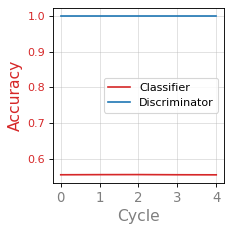

In [15]:
R.plot()